## Loan Status Prediction

- Main aim of this dataset to predict which of the customers will have their loan dataset
- Using machine learning model to predict it
- Dataset is Load prediction

In [1]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, chi2,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced  # Optional: For imbalanced classification report
from sklearn.utils import class_weight


SyntaxError: invalid syntax (_metadata_requests.py, line 1492)

In [ ]:
import pandas as pd

train_data = pd.read_csv('train.csv',index_col=None)
test_data = pd.read_csv('test.csv',index_col=None)

LoanData = pd.concat([train_data, test_data], axis=0)

# Reset index
LoanData.reset_index(drop=True, inplace=True)


LoanData.to_csv('LoanData.csv', index=False)


In [2]:
data=pd.read_csv('LoanData.csv',index_col=None)
data.head(15)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [92]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


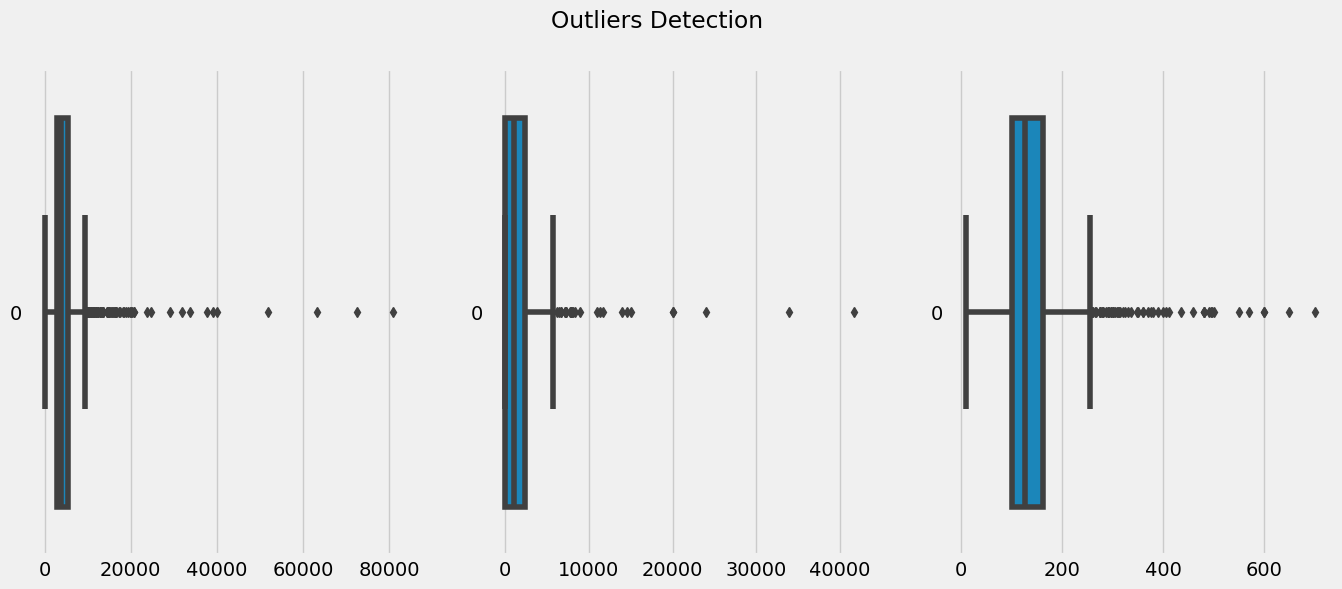

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'],orient='h')

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'],orient='h')

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'],orient='h')

plt.suptitle("Outliers Detection")
plt.show()

In [6]:
data.describe(include = 'object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002305,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [4]:
#Split into Quantitaive and Qualitive
def Quan_Qual_data(data):
    Quan=[]
    Qual=[]
    for columns in data.columns:
        if data[columns].dtypes=='O':
            Qual.append(columns)
        else:
            Quan.append(columns)
    return Quan,Qual

In [5]:
Quan,Qual=Quan_Qual_data(data)

In [9]:
Quan

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
Qual

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [6]:
#To check the null values
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [7]:
#Null values present in both categorical and numerical value
def replace_null(data):
    for columns in data.columns:
        if data[columns].dtypes=='O':
            data[columns].fillna(data[columns].mode()[0],inplace=True)
        else:
            data[columns].fillna(data[columns].median(),inplace=True)

                        

In [8]:
replace_null(data)

In [9]:
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

## Univariate

In [10]:
def Univariate(dataset,quan):
        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive

In [11]:
descriptive=Univariate(data,Quan)

In [12]:
descriptive

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Mean,5179.8,1601.92,0.849134,142.057,342.565
Median,3800,1110,1,126,360
Mode,2500,0,1,126,360
Q1:25%,2875,0,1,101,360
Q2:50%,3800,1110,1,126,360
Q3:75%,5516,2365,1,160,360
99%,25671,11034.4,1,482,480
Q4:100%,81000,41667,1,700,480
IQR,2641,2365,0,59,0
1.5rule,3961.5,3547.5,0,88.5,0


In [13]:
#Check the outliers
def check_outliers(Quan):
        Lesser = []
        Greater = []

        for column_name in Quan:
            if descriptive[column_name]['Min'] < descriptive[column_name]['Lesser']:
                Lesser.append(column_name)
            if descriptive[column_name]['Max'] > descriptive[column_name]['Greater']:
                Greater.append(column_name)
        return Lesser, Greater

In [14]:
Lesser,Greater=check_outliers(Quan)

In [15]:
Lesser

['Credit_History', 'LoanAmount', 'Loan_Amount_Term']

In [16]:
Greater

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [17]:
# Replace the Outliers
def replace_outliers(Lesser, Greater):
    for column_name in Lesser:
        data[column_name][data[column_name] < descriptive[column_name]['Lesser']] = descriptive[column_name]['Lesser']

    for column_name in Greater:
        data[column_name][data[column_name] > descriptive[column_name]['Greater']] = descriptive[column_name]['Greater']

    return descriptive

In [33]:
descriptive=replace_outliers(Lesser,Greater)

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
def Univariate(dataset,quan):
        descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%",
                                   "Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
        for columnName in quan:
            descriptive[columnName]["Mean"]=dataset[columnName].mean()
            descriptive[columnName]["Median"]=dataset[columnName].median()
            descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
            descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
            descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
            descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
            descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
            descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
            descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
            descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
            descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
            descriptive[columnName]["Min"]=dataset[columnName].min()
            descriptive[columnName]["Max"]=dataset[columnName].max()
            descriptive[columnName]["kurtosis"]=dataset[columnName].kurtosis()
            descriptive[columnName]["skew"]=dataset[columnName].skew()
            descriptive[columnName]["Var"]=dataset[columnName].var()
            descriptive[columnName]["Std"]=dataset[columnName].std()
        return descriptive

In [19]:
descriptive=Univariate(data,Quan)

In [20]:
descriptive



,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Mean,5179.8,1601.92,0.849134,142.057,342.565
Median,3800,1110,1,126,360
Mode,2500,0,1,126,360
Q1:25%,2875,0,1,101,360
Q2:50%,3800,1110,1,126,360
Q3:75%,5516,2365,1,160,360
99%,25671,11034.4,1,482,480
Q4:100%,81000,41667,1,700,480
IQR,2641,2365,0,59,0
1.5rule,3961.5,3547.5,0,88.5,0


In [21]:
#Frequency Dataframe
def freq_table(data,column):   
    freq_table=pd.DataFrame(columns=['Unique_value','Frequency','Relative_Freq','Cumulative_Frequency'])
    freq_table['Unique_value']=data[column].value_counts().sort_index(ascending=False)
    freq_table['Frequency']=data[column].value_counts().sort_values(ascending=False)
    freq_table['Relative_Freq']=freq_table['Frequency']/len(data)
    freq_table['Cumulative_Frequency']=freq_table['Relative_Freq'].cumsum()
    return freq_table

In [22]:
Quan

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'LoanAmount',
 'Loan_Amount_Term']

In [23]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount', 'Loan_Amount_Term']

for columns in features:
    max_frequency = data[columns].value_counts().idxmax()
    frequency_count = data[columns].value_counts().max()
    
    print(f"The most frequent value for {columns} is: {max_frequency}")
    print(f"The frequency count is: {frequency_count}")
    print()

The most frequent value for ApplicantIncome is: 2500
The frequency count is: 13

The most frequent value for CoapplicantIncome is: 0.0
The frequency count is: 429

The most frequent value for Credit_History is: 1.0
The frequency count is: 833

The most frequent value for LoanAmount is: 126.0
The frequency count is: 35

The most frequent value for Loan_Amount_Term is: 360.0
The frequency count is: 843



In [24]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,126.0,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.

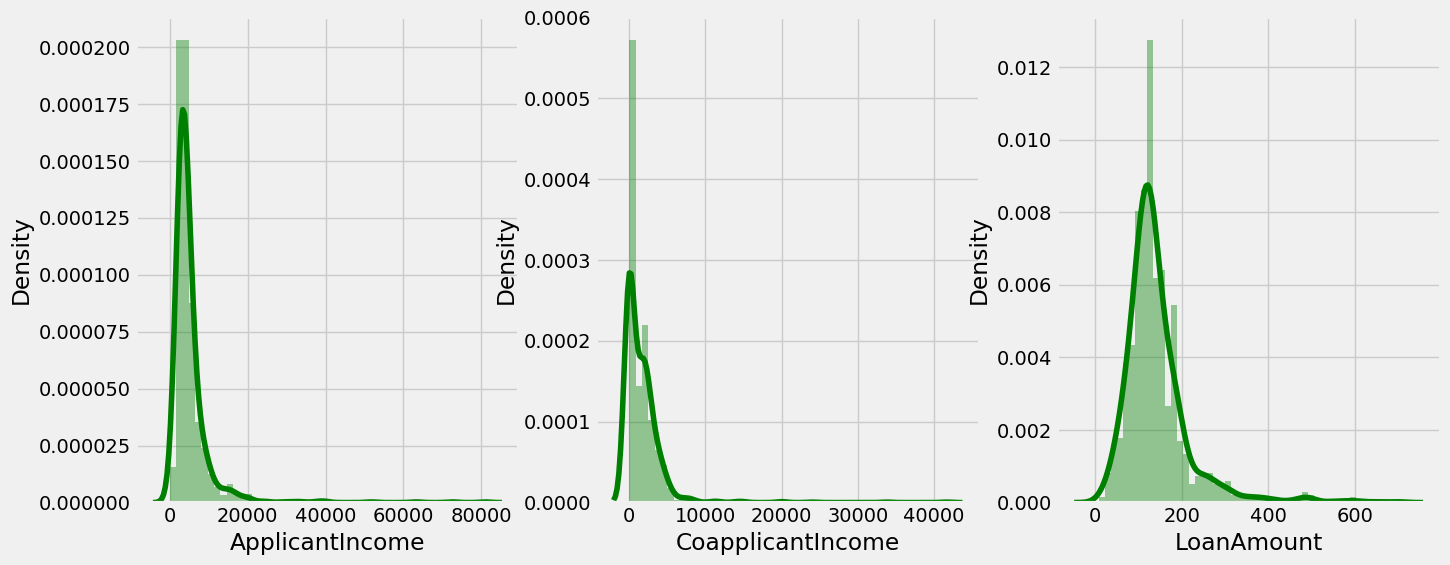

In [25]:
plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

In [26]:
## Standard Normal Distribution

def std_graph(data):
    # Calculate mean and standard deviation for each feature
    mean_values = data.mean()
    std_values = data.std()

    # Create subplots for each feature
    num_features = len(data.columns)
    fig, axes = plt.subplots(nrows=num_features, figsize=(8, 4 * num_features))

    # Iterate through each feature and plot its z-scores
    for i, feature in enumerate(data.columns):
        values = list(data[feature])
        z_scores = [(X - mean_values[feature]) / std_values[feature] for X in values]

        sns.distplot(z_scores, kde=True, ax=axes[i])
        axes[i].set_title(f'{feature} Z-Score Distribution')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()




C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()
C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  app.launch_new_instance()
C:\Users\Arun\anaconda

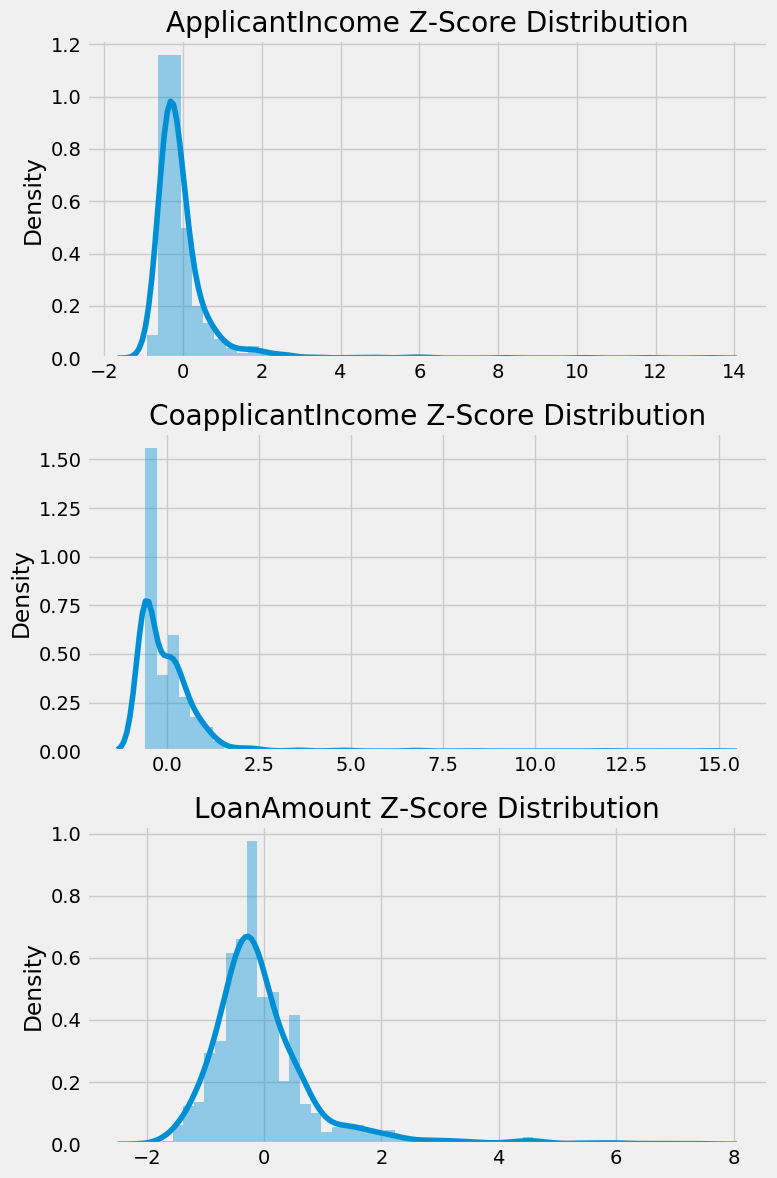

In [27]:
std_graph(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [28]:
data.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,126.0,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


In [29]:
data['Loan_Status'].value_counts()

Y    789
N    192
Name: Loan_Status, dtype: int64

## Bivariate

In [30]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].cov()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,3.243422e+07,-1.768968e+06,237659.169871
CoapplicantIncome,-1.768968e+06,7.391726e+06,37246.586619
LoanAmount,2.376592e+05,3.724659e+04,5836.286534


- covariance values are influenced by the scale of the variables, and it can be challenging to compare covariances directly. If you want a standardized measure that is easier to compare, you may consider the correlation coefficient, which normalizes the covariance by the standard deviations of the variables.

In [31]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.114247,0.546241
CoapplicantIncome,-0.114247,1.000000,0.179327
LoanAmount,0.546241,0.179327,1.000000


In Correlation


Its represents the correlation coefficients between different variables (ApplicantIncome, CoapplicantIncome, and LoanAmount). Correlation measures the strength and direction of a linear relationship between two variables:

ApplicantIncome and CoapplicantIncome: The correlation coefficient is approximately -0.233378. This suggests a weak negative correlation between ApplicantIncome and CoapplicantIncome. In other words, as one of these variables increases, the other tends to decrease slightly.

ApplicantIncome and LoanAmount: The correlation coefficient is approximately 0.527148. This indicates a moderate positive correlation between ApplicantIncome and LoanAmount. As ApplicantIncome increases, LoanAmount tends to increase as well.

CoapplicantIncome and LoanAmount: The correlation coefficient is approximately 0.242611. Similar to the ApplicantIncome-LoanAmount relationship, there is a weak positive correlation between CoapplicantIncome and LoanAmount. As CoapplicantIncome increases, LoanAmount tends to increase slightly.

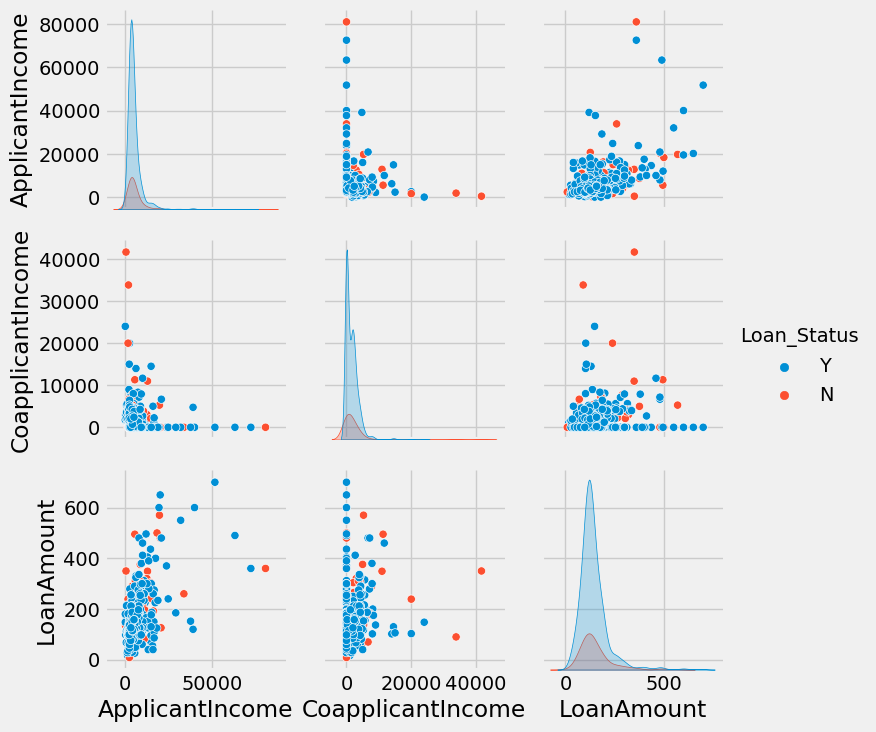

In [32]:
# visualize the pair to check multicollinearity

sns.pairplot(data[['ApplicantIncome','CoapplicantIncome','LoanAmount'] + ['Loan_Status']], hue='Loan_Status')
plt.show()


In [33]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [48]:
calc_vif(data[Quan])

C:\Users\Arun\anaconda3\envs\aiml\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,ApplicantIncome,1.865794
1,CoapplicantIncome,1.382020
2,LoanAmount,1.901545
3,Loan_Amount_Term,0.000000
4,Credit_History,0.000000


 - VIF values, there doesn't seem to be a significant multicollinearity issue among the variables

In [34]:
Qual

['Dependents',
 'Education',
 'Gender',
 'Loan_ID',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed']

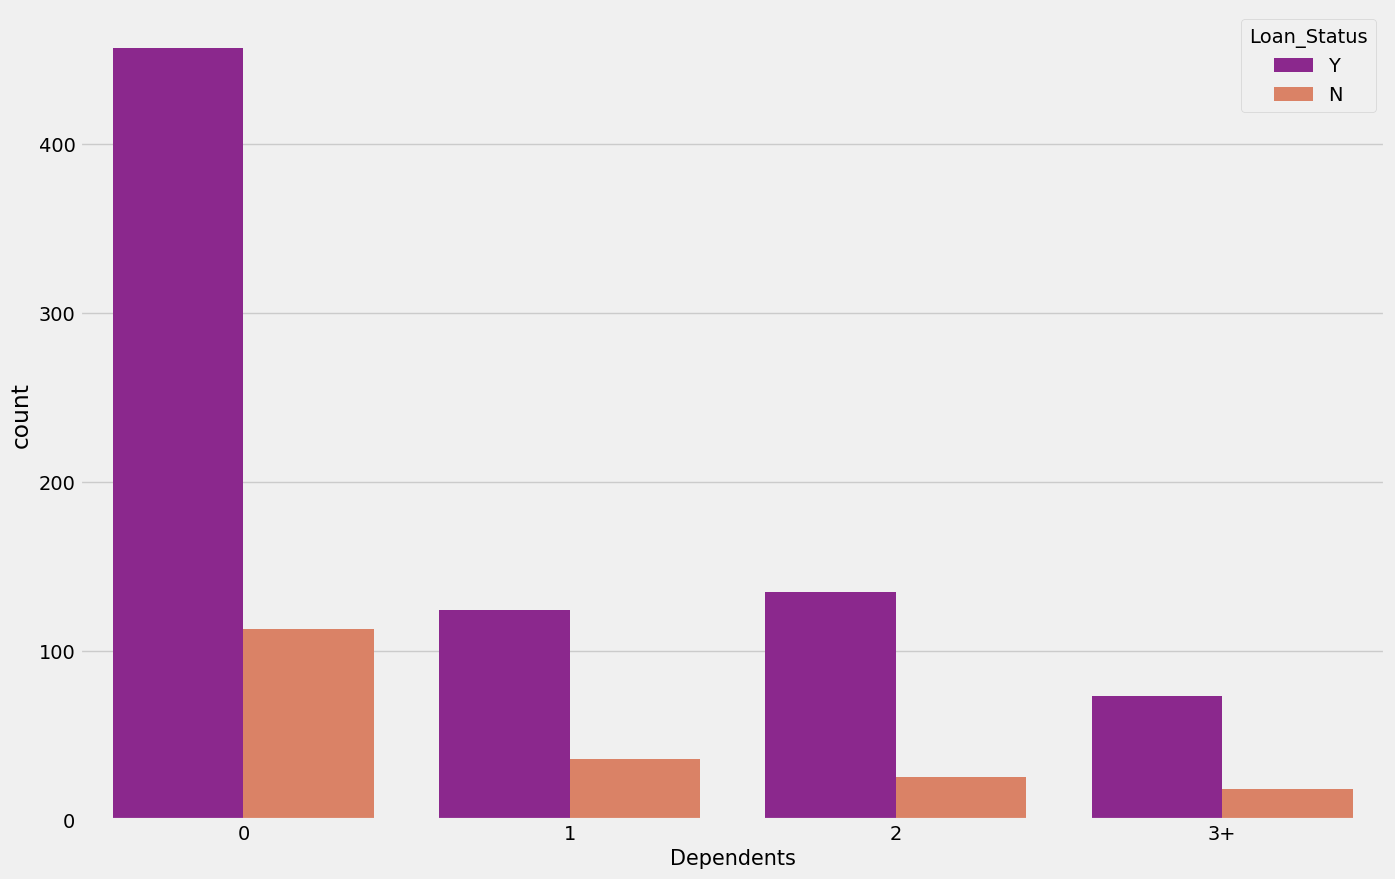

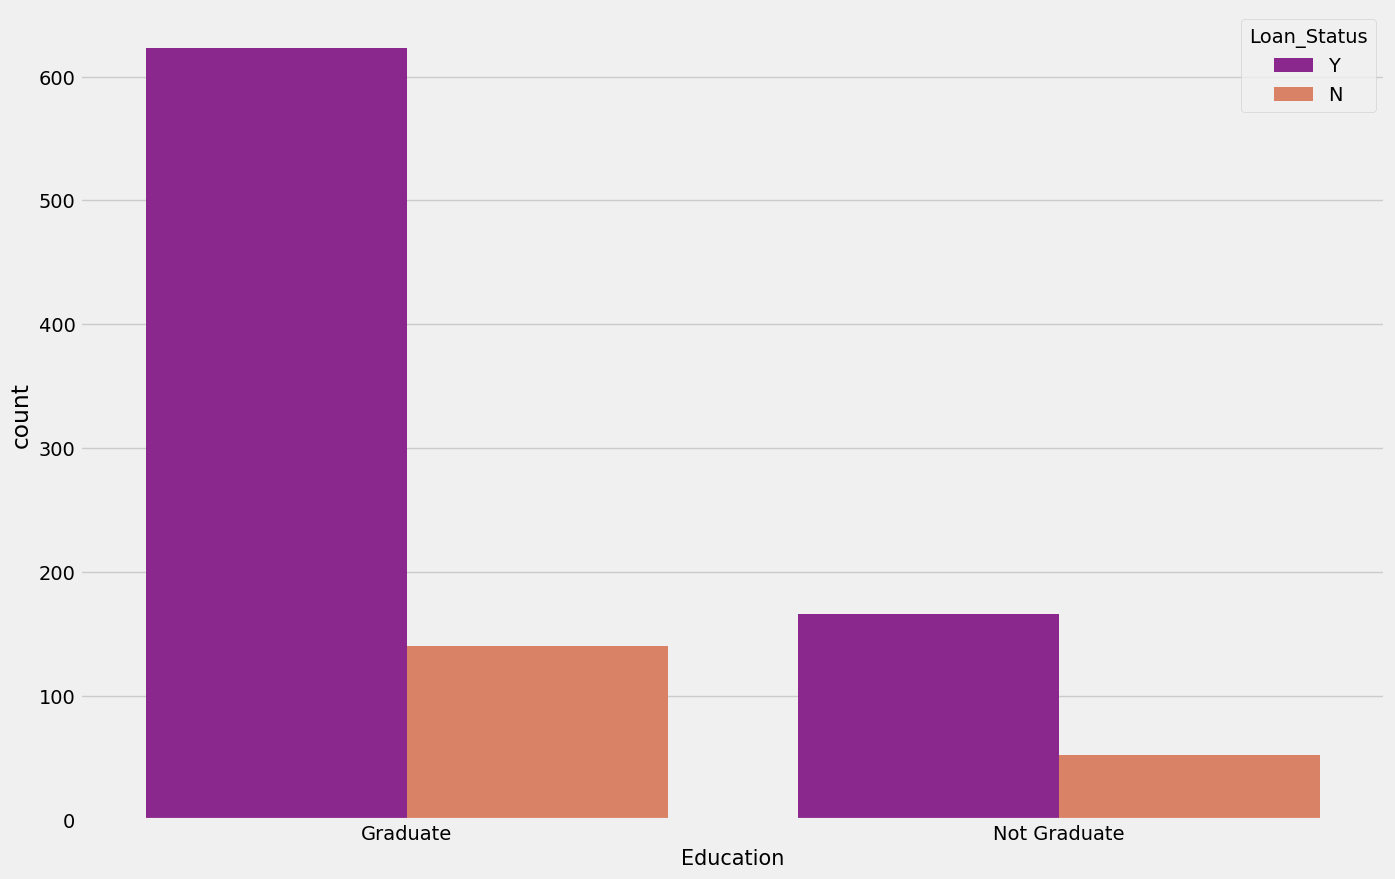

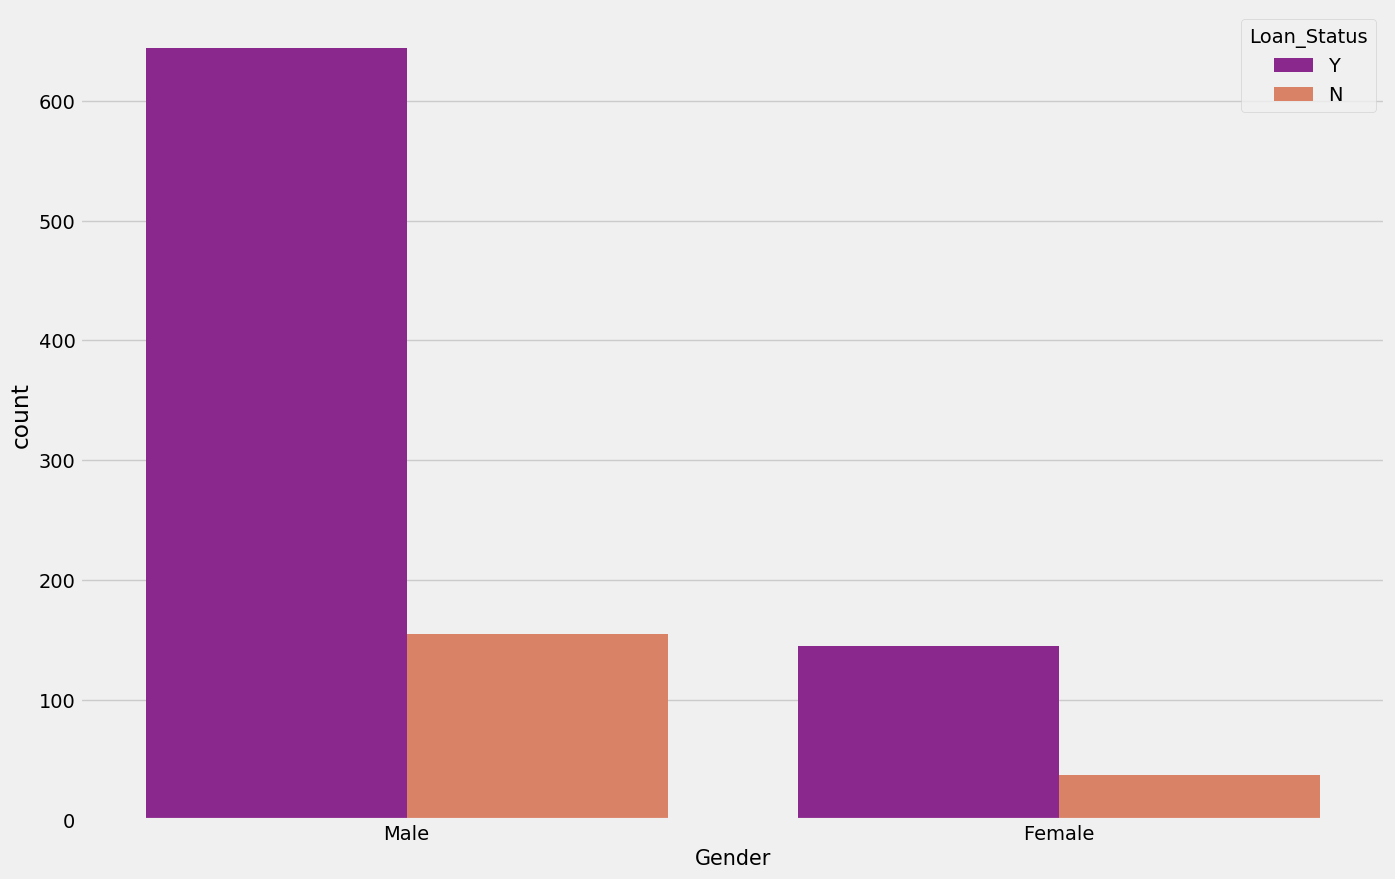

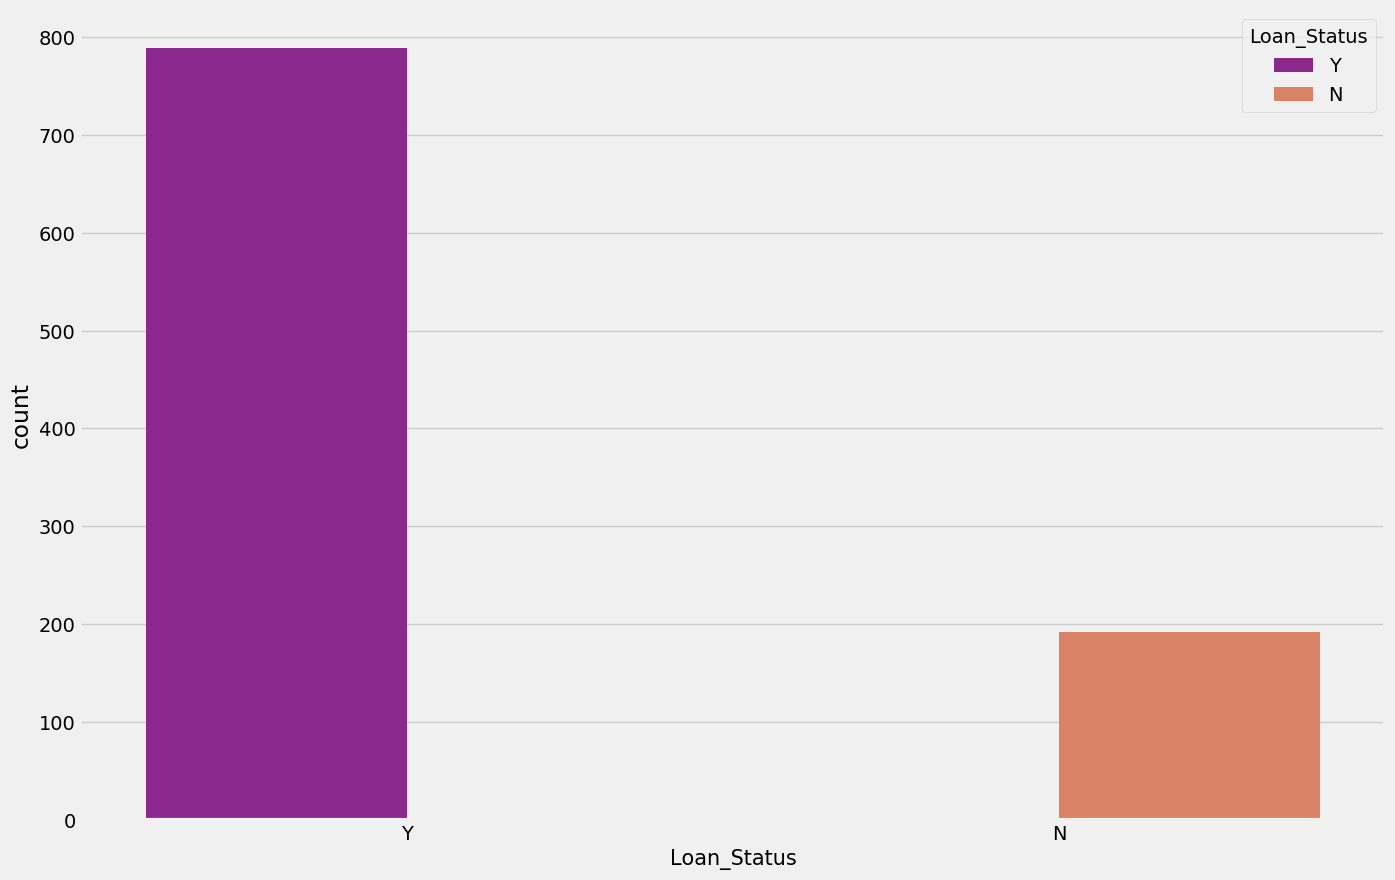

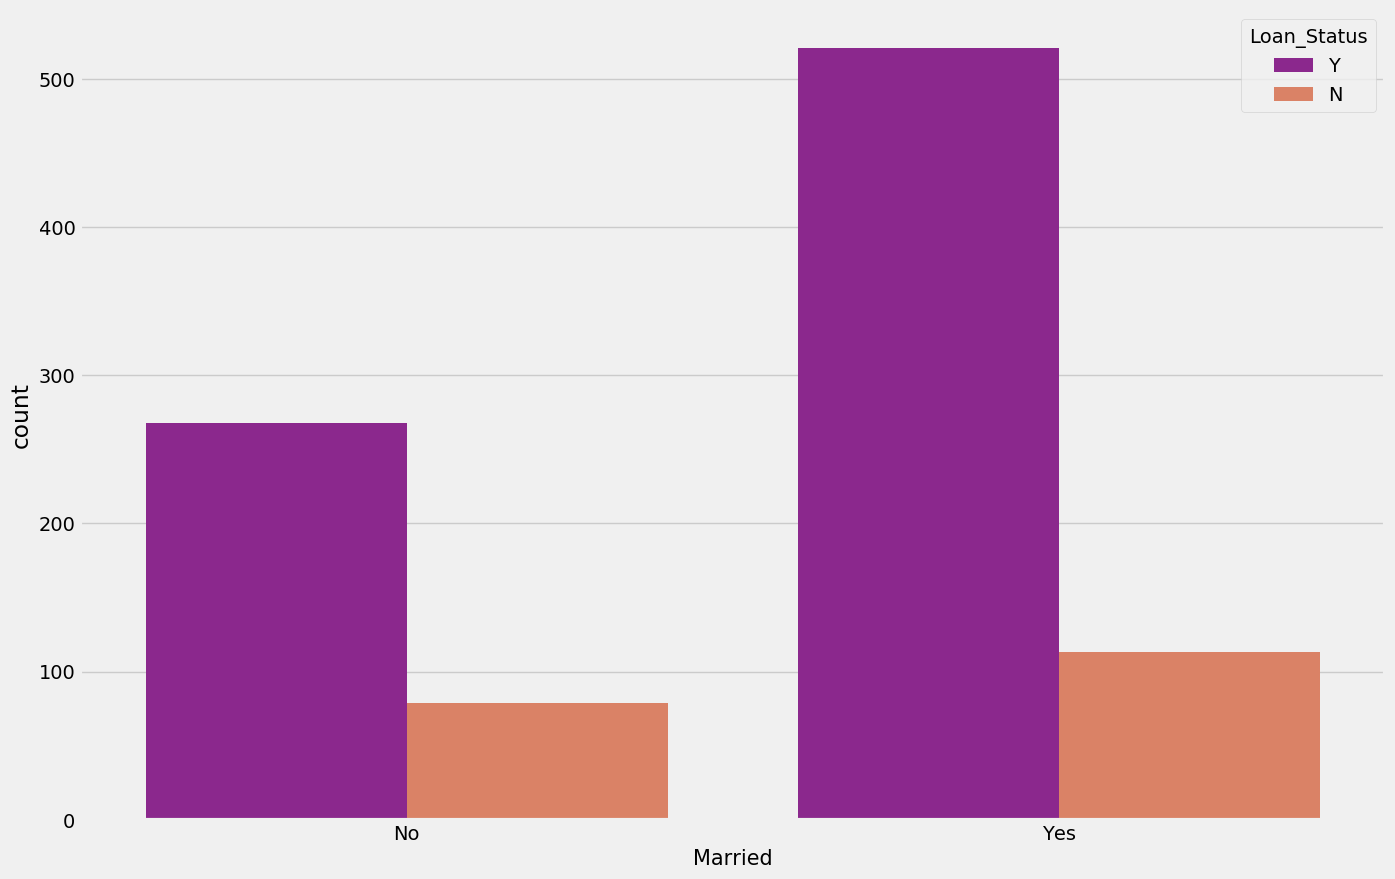

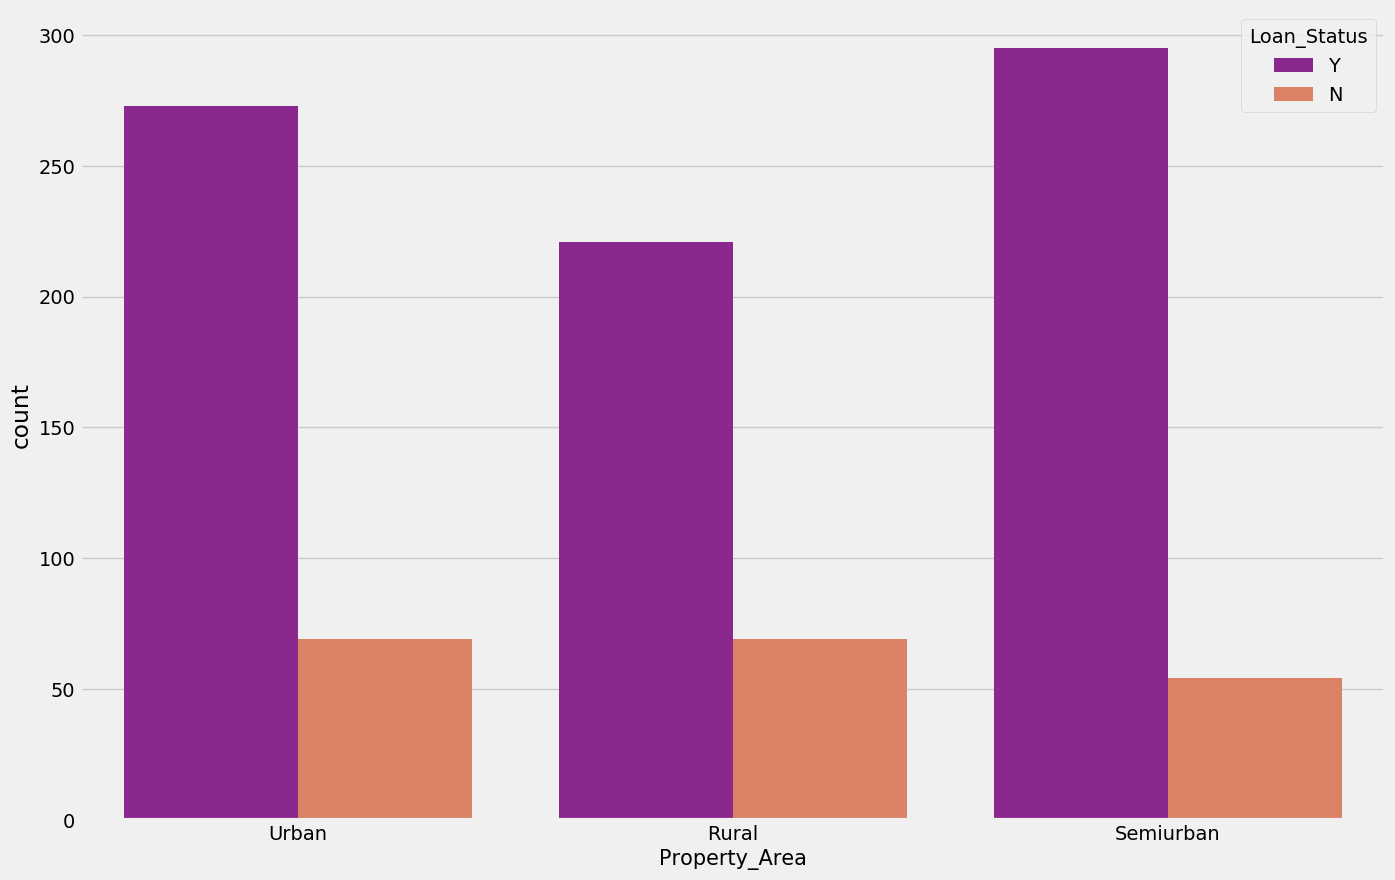

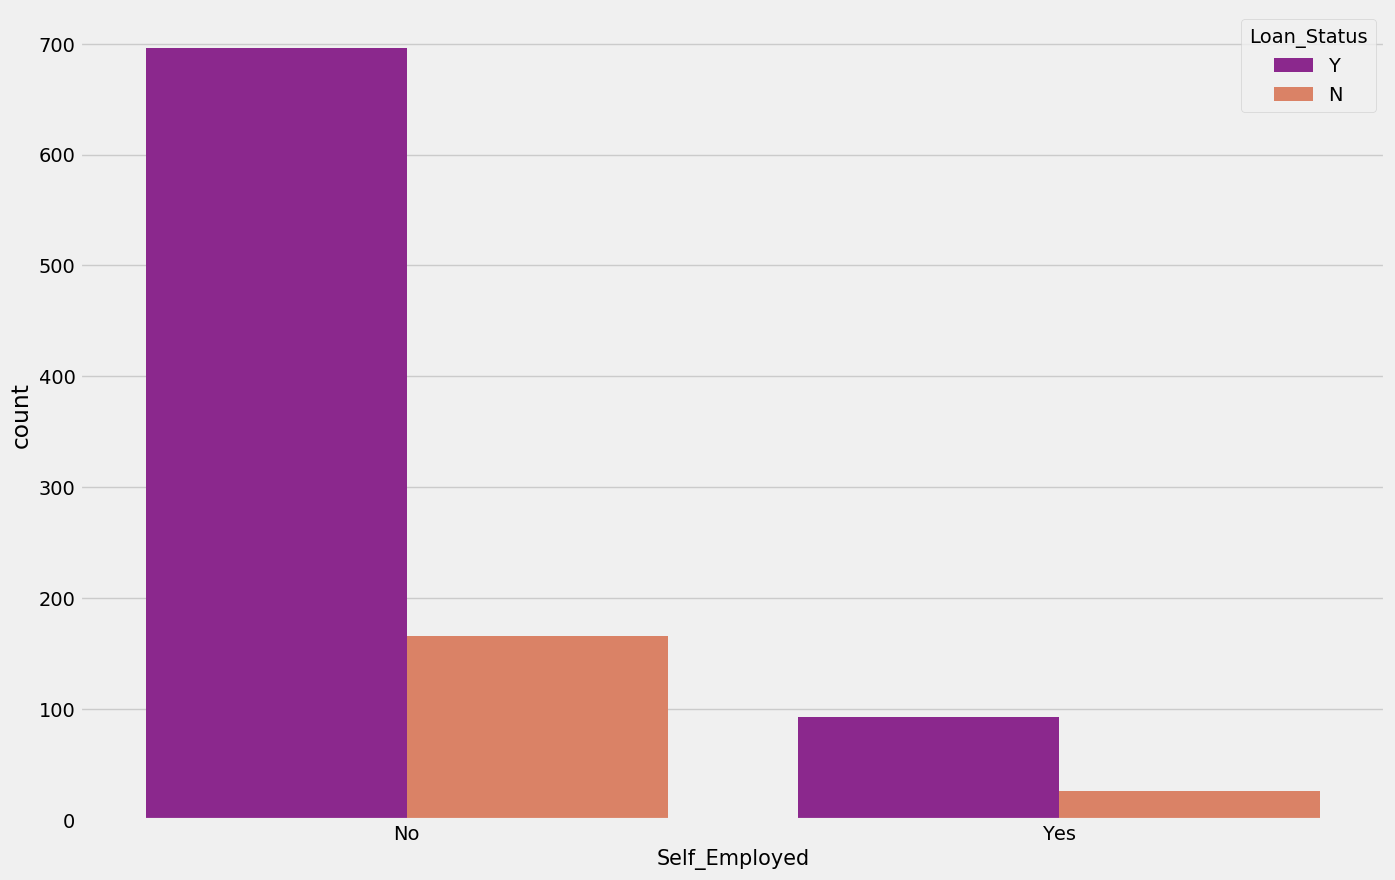

In [35]:
features=['Dependents',
 'Education',
 'Gender',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed']
for i in features:
    plt.figure(figsize = (15,10))
   # plt.subplot(1,3,2)
    sns.countplot(x =i, hue = 'Loan_Status', data = data, palette = 'plasma' )
    plt.xlabel(i, fontsize = 15)

In [36]:
data['Loan_Status'].value_counts()

Y    789
N    192
Name: Loan_Status, dtype: int64

## Chi Square Test when Input and target is categorical

In [37]:
from scipy.stats import chi2_contingency

categorical_features = ['Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']

for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['Loan_Status'])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Check p-value
    print(f"\nChi-square test for {feature}:")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant association.")
    else:
        print("Fail to reject the null hypothesis. No significant association.")



Chi-square test for Dependents:
Chi2 value: 2.480498024303937
P-value: 0.4788258392095254
Fail to reject the null hypothesis. No significant association.

Chi-square test for Education:
Chi2 value: 2.9234589302688794
P-value: 0.08730054293229367
Fail to reject the null hypothesis. No significant association.

Chi-square test for Gender:
Chi2 value: 0.03312766422949657
P-value: 0.8555748260999444
Fail to reject the null hypothesis. No significant association.

Chi-square test for Married:
Chi2 value: 3.174265318688888
P-value: 0.07480684753254349
Fail to reject the null hypothesis. No significant association.

Chi-square test for Property_Area:
Chi2 value: 7.087179533414148
P-value: 0.028909362722119254
Reject the null hypothesis. There is a significant association.

Chi-square test for Self_Employed:
Chi2 value: 0.29658880934605697
P-value: 0.5860288762195032
Fail to reject the null hypothesis. No significant association.


- significant difference between Education, Married, and Property_Area variables, while no significant associations were found for Dependents, Gender, and Self_Employed variables.

In [136]:
Quan

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

## Ttest or Anova test when input has numerical and Target has Categorical or Input has categoricl and Target has numerical

In [38]:
## Input has numerical and Target has Categorical

from scipy.stats import ttest_ind

# Split the data into two groups based on Loan_Status
loan_status_yes = data[data['Loan_Status'] == 'Y']
loan_status_no = data[data['Loan_Status'] == 'N']

# Perform t-test for each numerical feature
for feature in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    t_stat, p_value = ttest_ind(loan_status_yes[feature], loan_status_no[feature])
    
    print(f"\nT-test for {feature}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")



T-test for ApplicantIncome:
T-statistic: -0.7222413764194526
P-value: 0.4703185659870317
Fail to reject the null hypothesis. No significant difference.

T-test for CoapplicantIncome:
T-statistic: -1.5690430353301301
P-value: 0.11696104587817097
Fail to reject the null hypothesis. No significant difference.

T-test for LoanAmount:
T-statistic: -1.5622694117200708
P-value: 0.11854771041138121
Fail to reject the null hypothesis. No significant difference.


- there is no strong evidence of a significant difference between the groups with different Loan_Status values for these numerical features.

In [39]:
from scipy.stats import f_oneway

# Perform ANOVA for each numerical feature
for feature in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    groups = [data[data['Loan_Status'] == status][feature] for status in data['Loan_Status'].unique()]
    
    f_stat, p_value = f_oneway(*groups)
    
    print(f"\nANOVA for {feature}:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis. There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis. No significant difference.")



ANOVA for ApplicantIncome:
F-statistic: 0.5216326058122652
P-value: 0.47031856598695987
Fail to reject the null hypothesis. No significant difference.

ANOVA for CoapplicantIncome:
F-statistic: 2.4618960467179907
P-value: 0.11696104587819117
Fail to reject the null hypothesis. No significant difference.

ANOVA for LoanAmount:
F-statistic: 2.440685714796181
P-value: 0.11854771041139824
Fail to reject the null hypothesis. No significant difference.


- no significant difference in the means between the groups with different Loan_Status values ('Y' and 'N' and 'N/A)

## Define the function for feature selection,standardisation,splitting and model

In [50]:
def rfeFeature(indep_X, dep_Y, n):
    rfelist = []
    
    log_model = LogisticRegression(solver='lbfgs')
    RF = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    DT = DecisionTreeClassifier(criterion='gini', max_features='sqrt', splitter='best', random_state=0)
    svc_model = SVC(kernel='linear', random_state=0)

    rfemodellist = [log_model, svc_model, RF, DT] 

    for i in rfemodellist:
        print(i)
        log_rfe = RFE(i, n_features_to_select=n)
        log_fit = log_rfe.fit(indep_X, dep_Y)
        log_rfe_feature = log_fit.transform(indep_X)
        rfelist.append(log_rfe_feature)

    return rfelist

def selectkbest(indep_X, dep_Y, n):
    test = SelectKBest(score_func=chi2, k=n)
    fit1 = test.fit(indep_X, dep_Y)
    selectk_features = fit1.transform(indep_X)
    return selectk_features

def split_scalar(indep_X, dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.25, random_state=0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test

def cm_prediction(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    Accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    auc_score = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score

def logistic(X_train, y_train, X_test, y_test):       
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm, auc_score = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score    

def svm_linear(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='linear', random_state=0, probability=True)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm, auc_score = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score

def svm_NL(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='rbf', random_state=0, probability=True)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm, auc_score = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score

def Navie(X_train, y_train, X_test, y_test):       
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm, auc_score = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score

def knn(X_train, y_train, X_test, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm, auc_score = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score

def Decision(X_train, y_train, X_test, y_test):
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm, auc_score = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score

def random(X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm, auc_score = cm_prediction(classifier, X_test, y_test)
    return classifier, Accuracy, report, X_test, y_test, cm, auc_score

def rfe_classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf): 
    rfedataframe = pd.DataFrame(index=['Logistic', 'SVC', 'Random', 'DecisionTree'],
                                 columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Navie', 'Decision', 'Random'])

    for number, idex in enumerate(rfedataframe.index):
        rfedataframe['Logistic'][idex] = acclog[number]       
        rfedataframe['SVMl'][idex] = accsvml[number]
        rfedataframe['SVMnl'][idex] = accsvmnl[number]
        rfedataframe['KNN'][idex] = accknn[number]
        rfedataframe['Navie'][idex] = accnav[number]
        rfedataframe['Decision'][idex] = accdes[number]
        rfedataframe['Random'][idex] = accrf[number]
    return rfedataframe

def selectk_Classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf): 
    dataframe = pd.DataFrame(index=['ChiSquare'],
                             columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Navie', 'Decision', 'Random'])
    for number, idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex] = acclog[number]       
        dataframe['SVMl'][idex] = accsvml[number]
        dataframe['SVMnl'][idex] = accsvmnl[number]
        dataframe['KNN'][idex] = accknn[number]
        dataframe['Navie'][idex] = accnav[number]
        dataframe['Decision'][idex] = accdes[number]
        dataframe['Random'][idex] = accrf[number]
    return dataframe

In [54]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
data = data.drop('Loan_ID', axis=1)
data

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,126.0,360.0,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,1.0,3+,Not Graduate,Male,113.0,360.0,Y,Yes,Urban,Yes
977,4158,709.0,1.0,0,Graduate,Male,115.0,360.0,Y,Yes,Urban,No
978,3250,1993.0,1.0,0,Graduate,Male,126.0,360.0,Y,No,Semiurban,No
979,5000,2393.0,1.0,0,Graduate,Male,158.0,360.0,Y,Yes,Rural,No


In [42]:
data.isnull().sum()


ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
dtype: int64

In [43]:
#Replace the categorical value with numeric one its an ordinal one 
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))
data['Loan_Status']=data['Loan_Status'].replace(('Y','N'),(1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [44]:
data['Loan_Status'].value_counts()# Data is imbalanced

1    789
0    192
Name: Loan_Status, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null int64
Education            981 non-null int64
Gender               981 non-null int64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_Status          981 non-null int64
Married              981 non-null int64
Property_Area        981 non-null int64
Self_Employed        981 non-null int64
dtypes: float64(4), int64(8)
memory usage: 92.1 KB


In [46]:
data

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,1,1,126.0,360.0,1,0,1,0
1,4583,1508.0,1.0,1,1,1,128.0,360.0,0,1,0,0
2,3000,0.0,1.0,0,1,1,66.0,360.0,1,1,1,1
3,2583,2358.0,1.0,0,0,1,120.0,360.0,1,1,1,0
4,6000,0.0,1.0,0,1,1,141.0,360.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,1.0,1,0,1,113.0,360.0,1,1,1,1
977,4158,709.0,1.0,0,1,1,115.0,360.0,1,1,1,0
978,3250,1993.0,1.0,0,1,1,126.0,360.0,1,0,1,0
979,5000,2393.0,1.0,0,1,1,158.0,360.0,1,1,0,0


In [47]:
data.head(2)

indep_X=data.drop('Loan_Status', 1)
dep_Y=data['Loan_Status']

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [77]:
indep_X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900.0,0.0,71.0,360.0,1.0,0
610,1,1,1,1,0,4106.0,0.0,40.0,360.0,1.0,0
611,1,1,1,1,0,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,1,1,0,7583.0,0.0,187.0,360.0,1.0,1


In [78]:
dep_Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [49]:
dep_Y.value_counts()

1    789
0    192
Name: Loan_Status, dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null category
dtypes: category(1), float64(5), int64(6)
memory usage: 53.6 KB


In [52]:
kbest = selectkbest(indep_X, dep_Y, 2)       

acclog = []
accsvml = []
accsvmnl = []
accknn = []
accnav = []
accdes = []
accrf = []

X_train, X_test, y_train, y_test = split_scalar(kbest, dep_Y)   
    
classifier, Accuracy, report, X_test, y_test, cm, auc_score = logistic(X_train, y_train, X_test, y_test)
acclog.append(Accuracy)

classifier, Accuracy, report, X_test, y_test, cm, auc_score = svm_linear(X_train, y_train, X_test, y_test)  
accsvml.append(Accuracy)
    
classifier, Accuracy, report, X_test, y_test, cm, auc_score = svm_NL(X_train, y_train, X_test, y_test)  
accsvmnl.append(Accuracy)
    
classifier, Accuracy, report, X_test, y_test, cm, auc_score = knn(X_train, y_train, X_test, y_test)  
accknn.append(Accuracy)
    
classifier, Accuracy, report, X_test, y_test, cm, auc_score = Navie(X_train, y_train, X_test, y_test)  
accnav.append(Accuracy)
    
classifier, Accuracy, report, X_test, y_test, cm, auc_score = Decision(X_train, y_train, X_test, y_test)  
accdes.append(Accuracy)
    
classifier, Accuracy, report, X_test, y_test, cm, auc_score = random(X_train, y_train, X_test, y_test)  
accrf.append(Accuracy)


TypeError: The score function should be a callable, 0.29658880934605697 (<class 'numpy.float64'>) was passed.

In [ ]:
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

result

In [ ]:
# 1. Split the data
X_train, X_test, y_train, y_test = split_scalar(indep_X, dep_Y)

# 2. Logistic Regression
logistic_classifier, logistic_accuracy, logistic_report, logistic_X_test, logistic_y_test, logistic_cm,auc_score = logistic(X_train, y_train, X_test)

# results for logistic regression
print("Logistic Regression:")
print("Accuracy:", logistic_accuracy)
print("Classification Report:\n", logistic_report)
print("Confusion Matrix:\n", logistic_cm)
print("AUC Score:\n", auc_score)
print("\n")

# 3. Support Vector Machine (Linear)
svm_linear_classifier, svm_linear_accuracy, svm_linear_report, svm_linear_X_test, svm_linear_y_test, svm_linear_cm,auc_score = svm_linear(X_train, y_train, X_test)

# Print or use the results for SVM with linear kernel
print("SVM (Linear Kernel):")
print("Accuracy:", svm_linear_accuracy)
print("Classification Report:\n", svm_linear_report)
print("Confusion Matrix:\n", svm_linear_cm)
print("AUC Score:\n", auc_score)
print("\n")

# 4. Support Vector Machine (Non-linear)
svm_NL_classifier, svm_NL_accuracy, svm_NL_report, svm_NL_X_test, svm_NL_y_test, svm_NL_cm,auc_score = svm_NL(X_train, y_train, X_test)

# Print or use the results for SVM with non-linear kernel
print("SVM (Non-linear Kernel):")
print("Accuracy:", svm_NL_accuracy)
print("Classification Report:\n", svm_NL_report)
print("Confusion Matrix:\n", svm_NL_cm)
print("AUC Score:\n", auc_score)
print("\n")

# 5. Naive Bayes
naive_classifier, naive_accuracy, naive_report, naive_X_test, naive_y_test, naive_cm,auc_score = Navie(X_train, y_train, X_test)

# Print or use the results for Naive Bayes
print("Naive Bayes:")
print("Accuracy:", naive_accuracy)
print("Classification Report:\n", naive_report)
print("Confusion Matrix:\n", naive_cm)
print("AUC Score:\n", auc_score)
print("\n")

# 6. k-Nearest Neighbors
knn_classifier, knn_accuracy, knn_report, knn_X_test, knn_y_test, knn_cm,auc_score = knn(X_train, y_train, X_test)

# Print or use the results for k-Nearest Neighbors
print("k-Nearest Neighbors:")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)
print("Confusion Matrix:\n", knn_cm)
print("AUC Score:\n", auc_score)
print("\n")

# 7. Decision Tree
decision_classifier, decision_accuracy, decision_report, decision_X_test, decision_y_test, decision_cm,auc_score = Decision(X_train, y_train, X_test)

# Print or use the results for Decision Tree
print("Decision Tree:")
print("Accuracy:", decision_accuracy)
print("Classification Report:\n", decision_report)
print("Confusion Matrix:\n", decision_cm)
print("AUC Score:\n", auc_score)
print("\n")

# 8. Random Forest
random_classifier, random_accuracy, random_report, random_X_test, random_y_test, random_cm,auc_score = random(X_train, y_train, X_test)

# Print or use the results for Random Forest
print("Random Forest:")
print("Accuracy:", random_accuracy)
print("Classification Report:\n", random_report)
print("Confusion Matrix:\n", random_cm)
print("AUC Score:\n", auc_score)
print("\n")
